# **Sundanese Character Recognition🐻**

**Preparation**

In [ ]:
# dataset sunda
!git clone https://github.com/tnivram/capstone_dataset.git

# importing model
!git clone https://github.com/tnivram/capstone-related.git

Cloning into 'capstone_dataset'...
remote: Enumerating objects: 3767, done.
remote: Counting objects: 100% (3767/3767), done.
remote: Compressing objects: 100% (3766/3766), done.
remote: Total 3767 (delta 0), reused 3767 (delta 0), pack-reused 0
Receiving objects: 100% (3767/3767), 18.68 MiB | 7.04 MiB/s, done.
Cloning into 'capstone-related'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 5.04 MiB | 17.66 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import os

ROOT = '/content/capstone_dataset/sunda-dataset'

train_path = os.path.join(ROOT,'training')
val_path = os.path.join(ROOT,'validation')
test_path = os.path.join(ROOT,'test')

In [ ]:
# packages
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
plt.style.use('seaborn-v0_8')

from tensorflow.keras.models import load_model
import tensorflow as tf
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2

## **New bounding box version🟨**

In [ ]:
IMG_KA = mpimg.imread('/content/capstone_dataset/sunda-dataset/training/sunda_ka/ka_100.jpg')

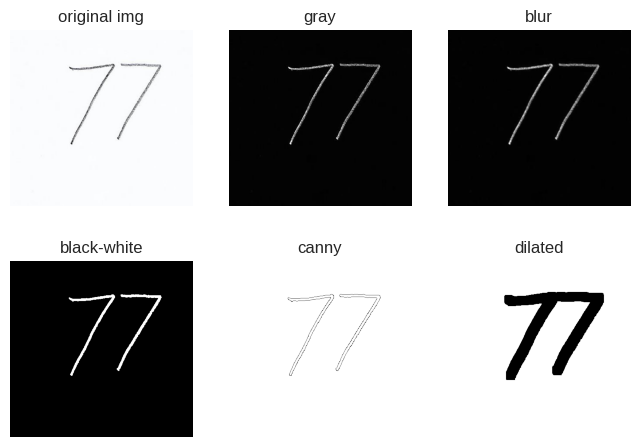

In [ ]:
gray = cv2.cvtColor(IMG_KA, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
bw = cv2.threshold(blur, 220, 255, cv2.THRESH_BINARY)[1]
canny = cv2.Canny(bw, 120, 245, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
dilate = cv2.dilate(canny, kernel, iterations=5)

img_process = [IMG_KA,gray,blur,bw,canny,dilate]
img_desc = ['original img', 'gray', 'blur', 'black-white', 'canny', 'dilated']

# show process of modify_img
fig, axs = plt.subplots(2, 3)

idx = 0
for ax in axs.flatten():
  ax.imshow(img_process[idx])
  ax.axis('off')
  ax.set_title(img_desc[idx])
  idx += 1

In [ ]:
# Turn the above procedure into a function that outputs the dilated black-and-white simage
def img_modifier(im):
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im = cv2.GaussianBlur(im, (3,3), 0)
  im = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY)[1]
  im = cv2.Canny(im, 150, 255, 1)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  im = cv2.dilate(im, kernel, iterations=5)
  return im

In [ ]:
def get_bounding(im_src, im, min_area=5000):
  img_obtained = []   # array to store all the bounded images
  cnts = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = list(cnts)
  cnts.sort(key=lambda x:cv2.boundingRect(x)[0])  # sort from the leftmost x coordinate

  for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        bound = cv2.rectangle(IMG_KA, (x, y), (x + w, y + h), (36,255,12), 2)
        img_part = im_src[y:y+h, x:x+w]
        img_obtained.append(img_part)

  return img_obtained

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ba49.mine2.png to ba49.mine2.png


In [ ]:
jawa_test = mpimg.imread('/content/ca_test (1).jpg')

In [ ]:
jawa_ = mpimg.imread('/content/ba49.mine2.jpg')

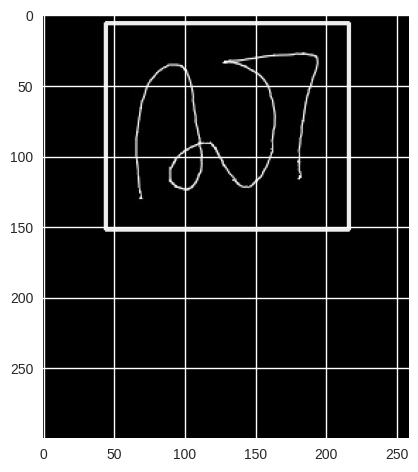

In [ ]:
#gray = cv2.cvtColor(jawa_test, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(jawa_test, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(canny, kernel, iterations=5)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 5000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        bound = cv2.rectangle(jawa_test, (x, y), (x + w, y + h), (36,255,12), 2)
        plt.imshow(bound)

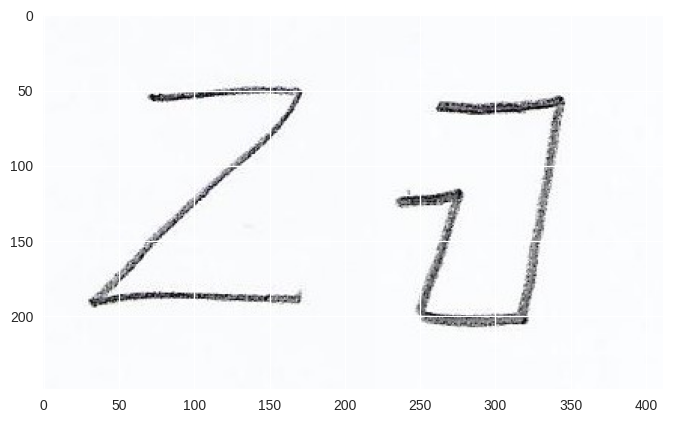

In [ ]:
# picture use to test get_bounding function
im_test = mpimg.imread('/content/nama_test.jpg')
plt.imshow(im_test)

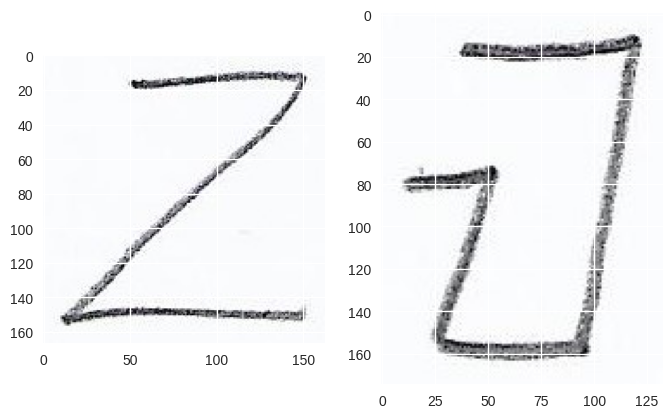

In [ ]:
mod_im = img_modifier(im_test)
bounding = get_bounding(im_test, mod_im)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(bounding[0])
axs[1].imshow(bounding[1])

## **Prediction Model🥦**


In [ ]:
# get the model
model = load_model('/content/capstone-related/model_sunda.h5')

In [ ]:
classes = ['sunda_a', 'sunda_ae','sunda_ba','sunda_ca','sunda_da','sunda_e','sunda_eu', 'sunda_fa', 'sunda_ga', 'sunda_ha', 'sunda_i', 'sunda_ja',
  'sunda_ka', 'sunda_la', 'sunda_ma', 'sunda_na', 'sunda_nga', 'sunda_nya', 'sunda_o', 'sunda_pa', 'sunda_qa', 'sunda_ra', 'sunda_sa', 'sunda_ta',
  'sunda_u', 'sunda_va', 'sunda_wa', 'sunda_xa', 'sunda_ya', 'sunda_za']

def get_char(pred_arr):
  predicted_char = classes[np.argmax(pred_arr)]
  predicted_char = predicted_char.split('_')
  predicted_char = predicted_char[1]

  return predicted_char

In [ ]:
def predict_single_image(im):
  im = tf.image.resize(im,(150,150))
  im = np.expand_dims(im,axis=0)
  pred = model.predict(im)
  predicted_char = get_char(pred)
  return predicted_char

In [ ]:
# complete model
def prediction_img(im):
  img_modified = img_modifier(im)
  bounded = get_bounding(im, img_modified)
  pred_text = []
  for images in bounded:
    char = predict_single_image(images)
    pred_text.append(char)

  predicted = ''.join(pred_text)

  return predicted


In [ ]:
predict = prediction_img(im_test)
predict

1/1 [==============================] - 0s 32ms/step


'nama'

### **Bounding Box**

In [ ]:
def modify_img(im):
  im = cv2.GaussianBlur(im, (5, 5), 5)    # blur to remove noise
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)     # turn into grayscale
  im = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY)[1]    # turn into black-white
  return im

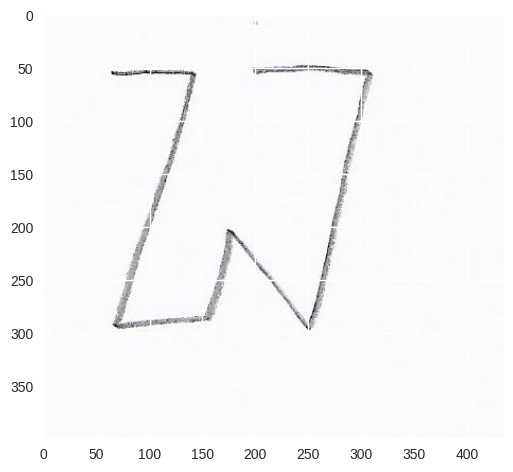

In [ ]:
# image for testing
IMG = mpimg.imread('/content/capstone_dataset/sunda-dataset/training/sunda_nya/nya_113.jpg')
plt.imshow(IMG)

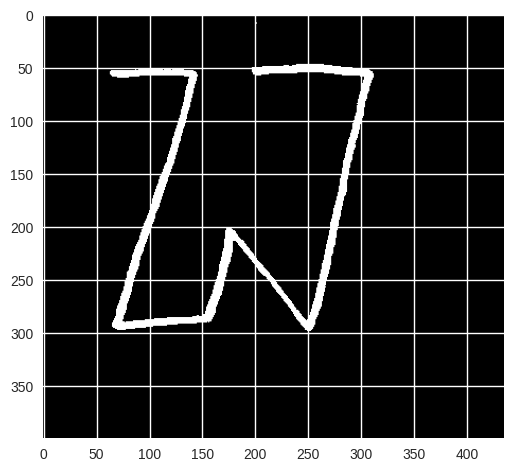

In [ ]:
# try modify_img
modified_img = modify_img(IMG)
plt.imshow(modified_img)

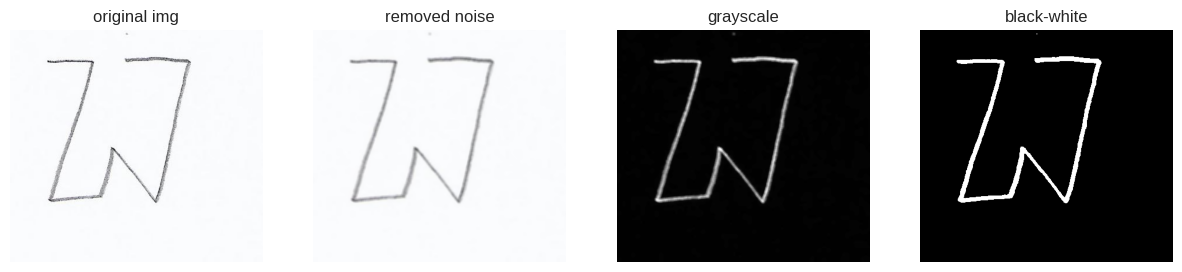

In [ ]:
# show process of modify_img
fig, ax = plt.subplots(1, 4, figsize=(15,60))

ax[0].imshow(IMG)
ax[0].set_title('original img')

im = cv2.GaussianBlur(IMG, (5, 5), 5)
ax[1].imshow(im)
ax[1].set_title('removed noise')

im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ax[2].imshow(im)
ax[2].set_title('grayscale')

im = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY)[1]
ax[3].imshow(im)
ax[3].set_title('black-white')

for a in ax:
  a.axis('off')

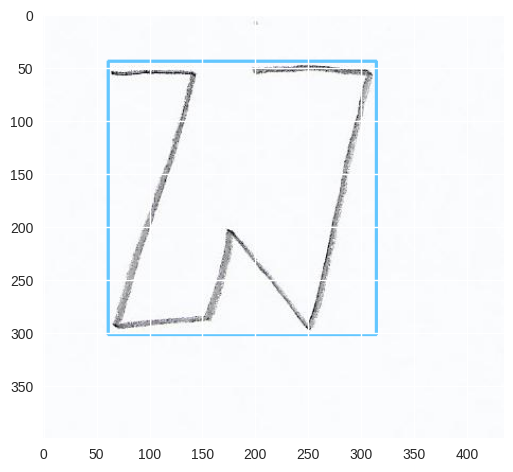

In [ ]:
# find contours, then sort by position
cnts, _ = cv2.findContours(modified_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnts = list(cnts)
cnts.sort(key=lambda x:cv2.boundingRect(x)[0])

threshold_area = 1000
for c in cnts[1:]:    # index 0 kena border terus
  area = cv2.contourArea(c)
  if area > threshold_area:
    x,y,w,h = cv2.boundingRect(c)
    bounding = cv2.rectangle(IMG, (x-2, y-2), (x + w + 2, y + h + 2), (98,198,255), 2)
    plt.imshow(bounding)

In [ ]:
# turn above procedure into a function
def find_bounding(IMG, img, threshold_area=1000, plot=True):
  box_arr = []    # array to store bounded image

  cnts, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  cnts = list(cnts)
  cnts.sort(key=lambda x:cv2.boundingRect(x)[0])

  for c in cnts[1:]:
    area = cv2.contourArea(c)
    if area > threshold_area:
      x,y,w,h = cv2.boundingRect(c)
      bounding = cv2.rectangle(IMG, (x-2, y-2), (x + w + 2, y + h + 2), (98,198,255), 2)

      if plot == True:    # set to false if we dont need to show the bounding box
        plt.imshow(bounding)

      # extract image
      img_part = IMG[(y-2):(y + h + 2), (x-2):(x + w + 2)]
      box_arr.append(img_part)

  return box_arr

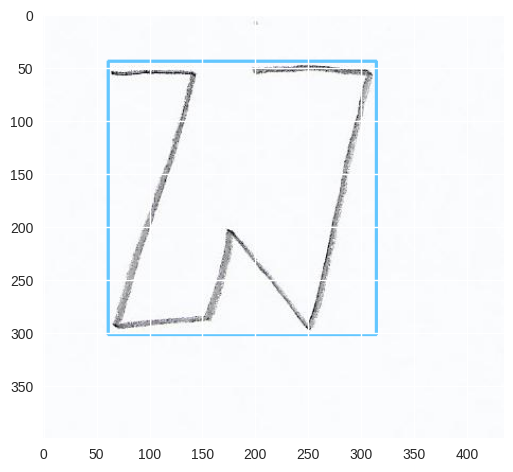

In [ ]:
# try out the function
img_obtained = find_bounding(IMG,modified_img)

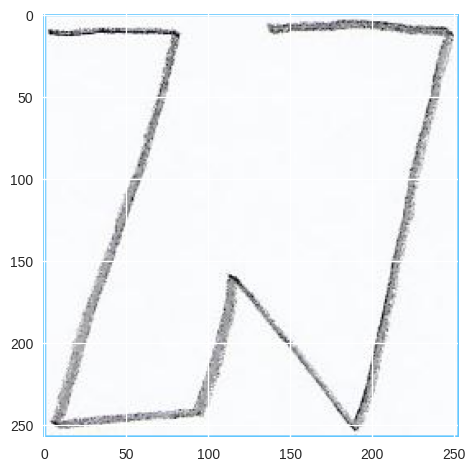

In [ ]:
# extracted img
for im in img_obtained:
  plt.imshow(im)

### **Archives**

Masalah #1: aksara 'ka, sa, ja' ada spasi di antara karakter nya, jadi gakan ke-detect satu contour

Masalah #2: gimana cara nentuin threshold area nya: khususnya buat yg ada lengkungan, cth: 'ca'

In [ ]:
IMG2 = mpimg.imread('/content/capstone_dataset/sunda-dataset/training/sunda_ka/ka_100.jpg')

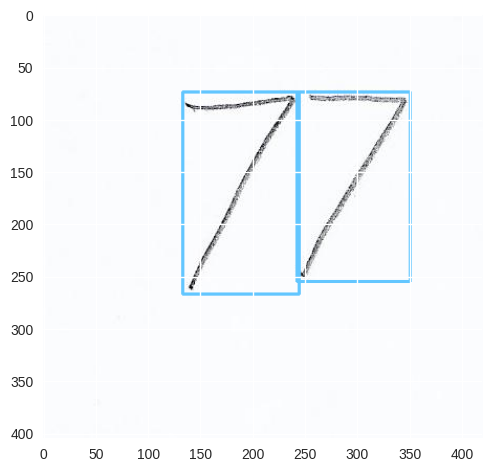

In [ ]:
modified_ka = modify_img(IMG2)

cnts, _ = cv2.findContours(modified_ka, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnts = list(cnts)
cnts.sort(key=lambda x:cv2.boundingRect(x)[0])

box_array = []
threshold_area = 1000
for c in cnts[1:]:    # index 0 kena border terus
  area = cv2.contourArea(c)
  if area > threshold_area:
    x,y,w,h = cv2.boundingRect(c)
    bounding = cv2.rectangle(IMG, (x-2, y-2), (x + w + 2, y + h + 2), (98,198,255), 2)
    plt.imshow(bounding)

    img_part = IMG2[(y-2):(y + h + 2), (x-2):(x + w + 2)]
    box_array.append(img_part)

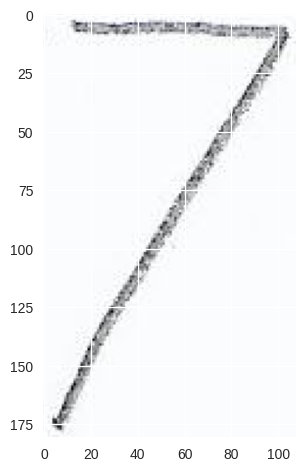

In [ ]:
plt.imshow(box_array[1])

In [ ]:
IMG3 = mpimg.imread('/content/capstone_dataset/sunda-dataset/training/sunda_ca/ca_13.jpg')

In [ ]:
modified_ca = modify_img(IMG3)

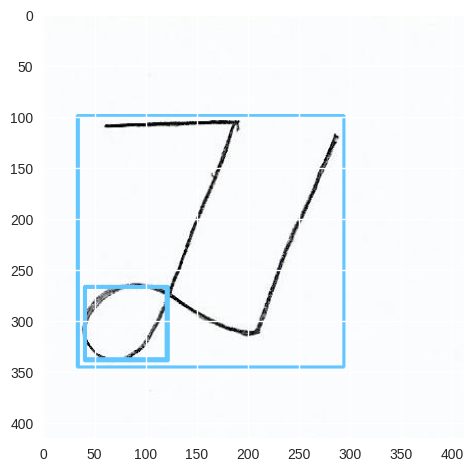

In [ ]:
img_finddd = find_bounding(IMG3, modified_ca, threshold_area=1000, plot=True)

## **Testing the models**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imgtest.jpg to imgtest.jpg


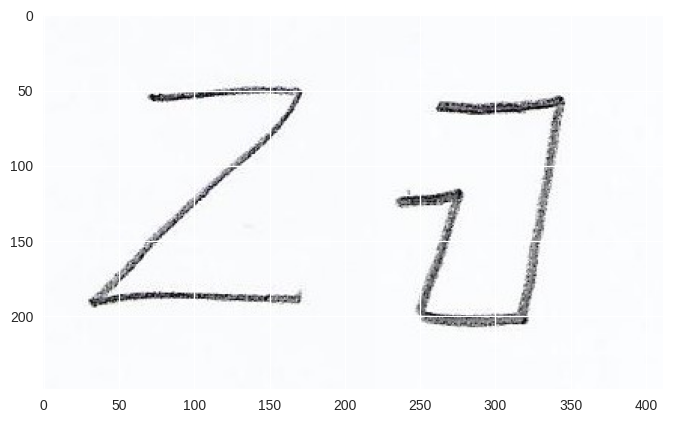

In [ ]:
IMG_TEST1 = mpimg.imread('/content/nama_test.jpg')
plt.imshow(IMG_TEST1)

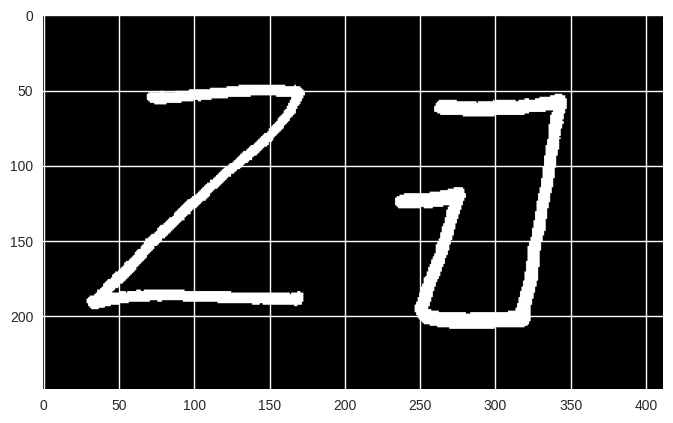

In [ ]:
img_test1_modified = modify_img(IMG_TEST1)
plt.imshow(img_test1_modified)

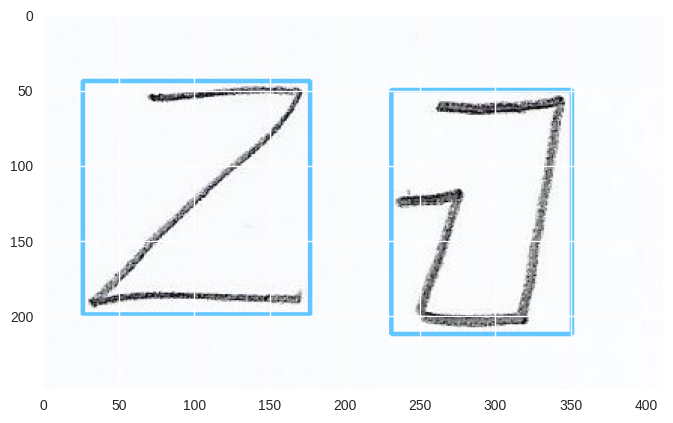

In [ ]:
test_img_list = find_bounding(IMG_TEST1, img_test1_modified, threshold_area=1400, plot=True)

In [ ]:
original = IMG2.copy()

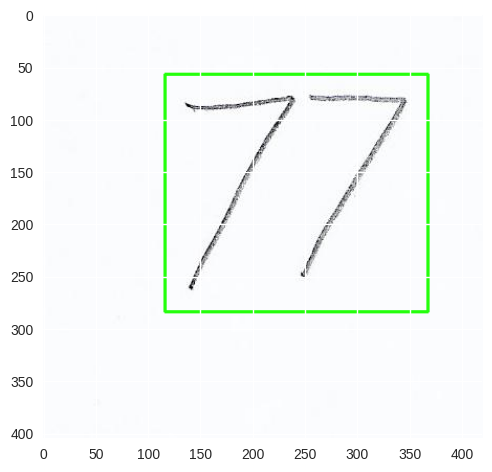

In [ ]:
gray = cv2.cvtColor(IMG2, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(canny, kernel, iterations=5)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 5000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        bound = cv2.rectangle(IMG2, (x, y), (x + w, y + h), (36,255,12), 2)
        plt.imshow(bound)


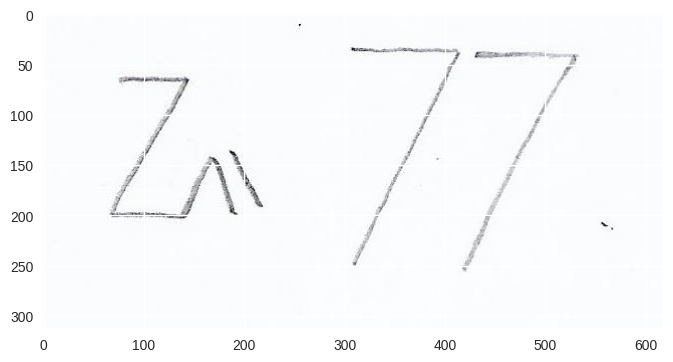

In [ ]:
IMG_TEST1 = mpimg.imread('/content/imgtest.jpg')
plt.imshow(IMG_TEST1)

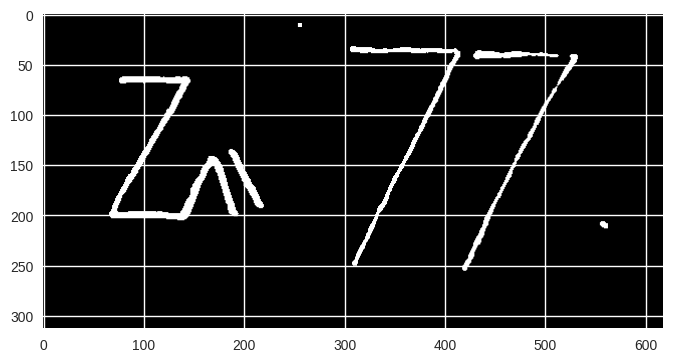

In [ ]:
ttt = modify_img(IMG_TEST1)
plt.imshow(ttt)

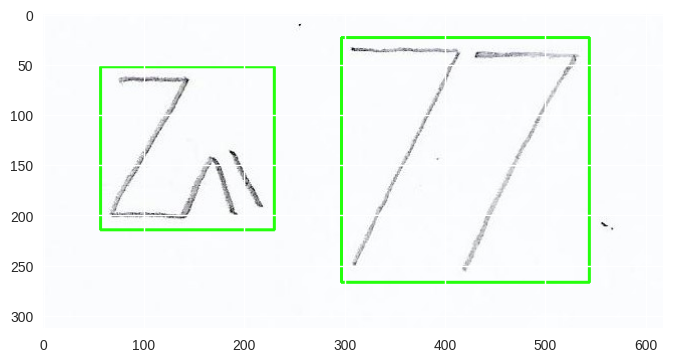

In [ ]:
gray = cv2.cvtColor(IMG_TEST1, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
dilate = cv2.dilate(canny, kernel, iterations=5)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 5000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        bound = cv2.rectangle(IMG_TEST1, (x, y), (x + w, y + h), (36,255,12), 2)
        plt.imshow(bound)


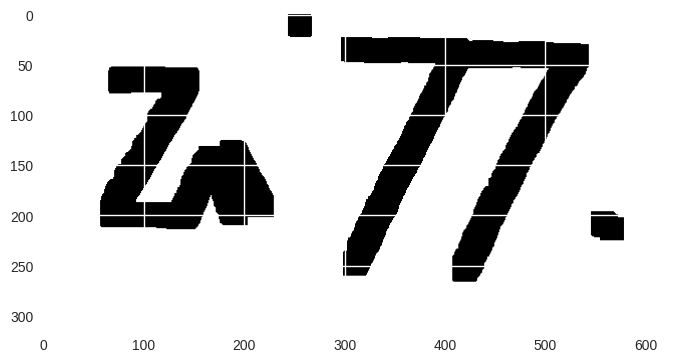

In [ ]:
plt.imshow(dilate)

In [ ]:
model = load_model('/content/capstone-related/model_sunda.h5')

In [ ]:
gbr = tf.image.resize(
    IMG,(150,150)
)
gbr = np.array(gbr)
gbr = gbr.astype(int)

In [ ]:
gbr.shape

(150, 150, 3)

In [ ]:
gbrr = np.expand_dims(gbr,axis=0)

In [ ]:
y = model.predict(gbrr)

1/1 [==============================] - 0s 94ms/step


In [ ]:
classes = os.listdir('/content/capstone_dataset/sunda-dataset/training')

In [ ]:
classes.sort()
classes[np.argmax(y)]

'sunda_nya'

In [ ]:
3**(11) % (17)

7